In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 11s 1us/step


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0718 16:08:05.038213  8864 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 16:08:05.041163  8864 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 16:08:05.045152  8864 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 16:08:05.071118  8864 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0718 16:08:05.073078  8864 deprecation_wrapper.py:119] From C:\Use

In [5]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [6]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


W0718 16:08:18.745139  8864 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 00001: val_loss improved from inf to 0.05912, saving model to ./model/01-0.0591.hdf5

Epoch 00002: val_loss improved from 0.05912 to 0.04552, saving model to ./model/02-0.0455.hdf5

Epoch 00003: val_loss improved from 0.04552 to 0.03856, saving model to ./model/03-0.0386.hdf5

Epoch 00004: val_loss improved from 0.03856 to 0.02969, saving model to ./model/04-0.0297.hdf5

Epoch 00005: val_loss improved from 0.02969 to 0.02816, saving model to ./model/05-0.0282.hdf5

Epoch 00006: val_loss did not improve from 0.02816

Epoch 00007: val_loss did not improve from 0.02816

Epoch 00008: val_loss did not improve from 0.02816

Epoch 00009: val_loss did not improve from 0.02816

Epoch 00010: val_loss did not improve from 0.02816

Epoch 00011: val_loss did not improve from 0.02816

Epoch 00012: val_loss did not improve from 0.02816

Epoch 00013: val_loss did not improve from 0.02816

Epoch 00014: val_loss improved from 0.02816 to 0.02732, saving model to ./model/14-0.0273.hdf5

Epoch 00015

In [7]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 3s 347us/step

 Test Accuracy: 0.9922


In [8]:
y_vloss = history.history['val_loss']

In [9]:
y_loss = history.history['loss']

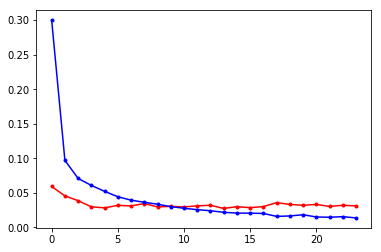

In [12]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

W0718 16:33:58.090378  8864 legend.py:1289] No handles with labels found to put in legend.


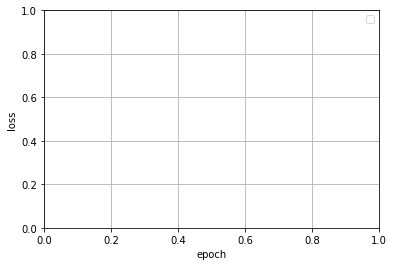

In [13]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()